<a href="https://colab.research.google.com/github/manipta/Performance_Comparision/blob/main/PerformanceComparision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Performance Comparision of Various Languages

In [9]:
from google.colab import files
uploaded = files.upload()

Saving C.c to C.c
Saving Cpp.cpp to Cpp.cpp
Saving Python.py to Python.py


Upload the codes

These are the code for converting lowercase content to upper case

then run following

**Time taken by Languages to a file**


In [10]:
import random as rd
import pandas as pd
import os
import string as s
import time
# x axis
stsize=1
endsize=int(input("Enter the max size of file to convert(in GB,<=5):") ) 
stepsize=1
# x axis
T={}

# for creating file(size)
def file(ab):
  fd=open('my_file.txt','w')
  size=os.path.getsize('my_file.txt')
  a="".join((rd.sample(s.ascii_letters,50)))
  for k in range(0,ab*3):
    a="".join((rd.sample(s.ascii_letters,50)))+a
  rsize=(1024*1024*1024*ab)
  while size<(rsize):
    fd.write(a)
    size=os.path.getsize('my_file.txt')
  print(size/(rsize/ab),"GB file created!!")
  fd.close()


for i in range(stsize,endsize+1,stepsize):
  file(i)
  start=time.time()
  os.system('gcc C.c;./a.out') #Linux
  end=time.time()
  # os.system('gcc C.c&a.exe') #win
  if(not('C' in T)):
    T['C']=[(end-start)]
  else:
    T['C'].append((end-start))
  
  start=time.time()
  os.system('g++ Cpp.cpp;./a.out') #Linux
  end=time.time()
  # os.system('g++ -o program Cpp.cpp&program.exe') #win
  if(not('Cpp' in T)):
    T['Cpp']=[(end-start)]
  else:
    T['Cpp'].append((end-start))
  start=time.time()
  os.system('python Python.py')
  end=time.time()
  if(not('Python' in T)):
    T['Python']=[(end-start)]
  else:
    T['Python'].append((end-start))
  print(T,"\n")
d1=pd.DataFrame(T,index=[str(i)+"GB" for i in range(stsize,endsize+1,stepsize)])
d1


Enter the max size of file to convert(in GB,<=5):5
1.0000066831707954 GB file created!!
{'C': [5.470971345901489], 'Cpp': [8.326520681381226], 'Python': [4.491602420806885]} 

2.000001445412636 GB file created!!
{'C': [5.470971345901489, 8.314262390136719], 'Cpp': [8.326520681381226, 8.496781349182129], 'Python': [4.491602420806885, 6.6529860496521]} 

3.0000023543834686 GB file created!!
{'C': [5.470971345901489, 8.314262390136719, 12.021271705627441], 'Cpp': [8.326520681381226, 8.496781349182129, 12.295942306518555], 'Python': [4.491602420806885, 6.6529860496521, 9.345451831817627]} 

4.000006662681699 GB file created!!
{'C': [5.470971345901489, 8.314262390136719, 12.021271705627441, 16.812172174453735], 'Cpp': [8.326520681381226, 8.496781349182129, 12.295942306518555, 16.854175567626953], 'Python': [4.491602420806885, 6.6529860496521, 9.345451831817627, 67.0691568851471]} 

5.000003427267075 GB file created!!
{'C': [5.470971345901489, 8.314262390136719, 12.021271705627441, 16.812172

,C,Cpp,Python
1GB,5.470971,8.326521,4.491602
2GB,8.314262,8.496781,6.652986
3GB,12.021272,12.295942,9.345452
4GB,16.812172,16.854176,67.069157
5GB,21.370670,20.430563,332.890368


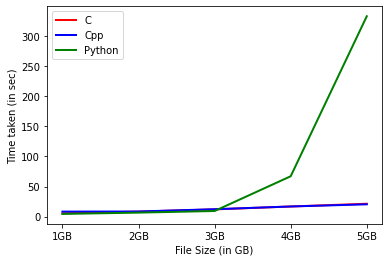

In [11]:
import matplotlib.pyplot as plt
color=['r','b','g']
plt.ylabel("Time taken (in sec)")
plt.xlabel("File Size (in GB)")
size=d1.index
for i in range(0,len(d1.columns)):
  plt.plot(size,T[d1.columns[i]],color=color[i], label=d1.columns[i],linewidth=2)

plt.legend()
plt.show()